In [203]:
# logistic regression implementation in tensorflow
# data reference https://archive.ics.uci.edu/ml/datasets/Adult
# task prediction task is to determine whether a person makes over 50K a year
# data can download from https://ntumlta.github.io/2017fall-ml-hw2/
# categorical variables:
# workclass：(9包含未知项) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
# education:(16)[' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',' HS-grad', ' Masters', ' Preschool', ' Prof-school',' Some-college']
# marital_status:(7)[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',' Married-spouse-absent', ' Never-married', ' Separated',' Widowed']
# occupation:(15包含未知项)[' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',' Machine-op-inspct', ' Other-service', ' Priv-house-serv',' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',' Transport-moving']
# relationship:(6)[' Husband', ' Not-in-family', ' Other-relative', ' Own-child',' Unmarried', ' Wife']
# race:(5)[' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White']
# sex:(2)
# native_country:(42包含未知项)[' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago', ' United-States', ' Vietnam', ' Yugoslavia']
# 1,3,5,6,7,8,13 #不对sex做one-hot-encoding
# continuous:
# age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week //education_num与education一一对应

import tensorflow as tf
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [164]:
train = pd.read_csv("./UCI/train.csv")
print(train.columns,test.shape)
test = pd.read_csv("./UCI/test.csv")
print(test.columns,test.shape)

X_train = train[train.columns[:14]]
y_train = train[["income"]]
X_test = test
print(np.unique(train.workclass).shape)
print(np.unique(train.education).shape)
print(np.unique(train.marital_status).shape)
print(np.unique(train.occupation).shape)
print(np.unique(train.relationship).shape)
print(np.unique(train.race).shape)
print(np.unique(train.sex).shape)
print(np.unique(train.native_country).shape)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object') (16281, 13)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object') (16281, 14)
(9,)
(16,)
(7,)
(15,)
(6,)
(5,)
(2,)
(42,)


In [211]:
y_test = pd.read_csv("UCI/correct_answer.csv")

y_test = y_test[['label']].values

y_test.shape

# 对分类类别进行编码
def labelEncoder(mapColumn,data):
    mapping_digits = {label: idx for idx, label in enumerate(np.unique(data[mapColumn]))}
    data[mapColumn] = data[mapColumn].map(mapping_digits)

for columnName in ["workclass","education","marital_status","occupation","relationship","race","sex","native_country"]:
    labelEncoder(columnName,X_train)

# 对y类类别进行分类处理：
def labelEncoder1(mapColumn,data):
    mapping_digits = {label: idx for idx, label in enumerate(np.unique(data[mapColumn]))}
    data[mapColumn] = data[mapColumn].map(mapping_digits)
    
labelEncoder1("income",y_train)

In [167]:
y

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [130]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categorical_features=np.array([False,True,False,True,False,True,True,True,True,False,False,False,False,True]))
enc.fit(X_train)
oneHot = enc.transform(X_train).toarray()
oneHot[:,3]

enc1 = OneHotEncoder(categorical_features = np.array([1,3,5,6,7,8,13]))
enc1.fit(X_train)
oneHotEncoding = enc1.transform(X_train).toarray()
oneHotEncoding

array([0., 0., 0., ..., 0., 0., 0.])

In [134]:
transformed = pd.read_csv("UCI/X_train") # 在给的二进制文件当中，去掉了education_num这个变量

In [149]:
# transformed.education_num
# X_train.education_num
np.unique(X_train.education_num).shape
X_train[['education_num','education']].groupby(['education_num','education']).count()
educations = X_train[['education_num','education']].copy()
educations['count'] = 1
educations
educations.pivot_table(values = 'count', index = ['education_num','education'],aggfunc = np.sum)

/home/lily/tf3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [168]:
#由上面分析可知 education与education_num是完全相关的，所以drop education_num这个变量

X_train.drop(['education_num'],axis = 1, inplace=True)
X_test.drop(['education_num'],axis = 1, inplace=True)

/home/lily/tf3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [169]:
for columnName in ["workclass","education","marital_status","occupation","relationship","race","sex","native_country"]:
    labelEncoder(columnName,X_test)

In [196]:
## 重新对上面的数据进行one_hot_encoding:
enc = OneHotEncoder(categorical_features=np.array([False,True,False,True,True,True,True,True,False,False,False,False,True]))
enc.fit(X_train)
X_train_one_hot = enc.transform(X_train).toarray()
X_test_one_hot = enc.transform(X_test).toarray()
y_train = y_train.values

In [190]:
def _sigmoid(z):
    res = 1/(1.0+bp.exp(-z))
    return np.clip(res,1e-8,1-(1-(1e-8)))

def _shuffle(X,y):
    random_ind = np.arange(X.shape[0]) #或者是len(X)
    np.random.shuffle(random_ind)
    return (X[random_ind],y[random_ind])

# 这里利用了train的数据的scale的参数对test数据做调整，将他们一起归一化会有data snooping的风险
def _normalization(X_train, X_test):
    n_samples = len(X_train)
    mu = sum(X_train)/n_samples 
    sigma = np.std(X_train,axis=0)
    mu_train = np.tile(mu,(n_samples ,1))
    sigma_train = np.tile(sigma,(n_samples ,1))
    mu_test = np.tile(mu,(len(X_test),1))
    sigma_test = np.tile(sigma,(len(X_test),1))
    X_train_normed = (X_train-mu_train)/sigma_train
    
    X_test_normed = (X_test-mu_test)/sigma_test
    
    return X_train_normed,X_test_normed

def _train_valid_split(X,y,percentage):
    n_samples = len(X)
    train_samples = percentage*n_samples
    
    X,y = _shuffle(X,y)
    
    X_train,y_train = X[0:train_samples],y[0:train_samples]
    X_valid,y_valid = X[train_samples:],y[train_samples:]
    return X_train, y_train, X_valid, y_valid

In [191]:
X_train_one_hot_normed,X_test_one_hot_normed = _normalization(X_train_one_hot, X_test_one_hot)

Epoch: 0001 cost= 0.458120400
Epoch: 0002 cost= 0.362409745
Epoch: 0003 cost= 0.343075651
Epoch: 0004 cost= 0.335331411
Epoch: 0005 cost= 0.330849974
Epoch: 0006 cost= 0.327954126
Epoch: 0007 cost= 0.326058585
Epoch: 0008 cost= 0.324586529
Epoch: 0009 cost= 0.323434817
Epoch: 0010 cost= 0.322656993
Epoch: 0011 cost= 0.321798680
Epoch: 0012 cost= 0.321398948
Epoch: 0013 cost= 0.320848041
Epoch: 0014 cost= 0.320367563
Epoch: 0015 cost= 0.320022907
Epoch: 0016 cost= 0.319778411
Epoch: 0017 cost= 0.319437499
Epoch: 0018 cost= 0.319150175
Epoch: 0019 cost= 0.318942014
Epoch: 0020 cost= 0.318721447
Epoch: 0021 cost= 0.318568437
Epoch: 0022 cost= 0.318395416
Epoch: 0023 cost= 0.318230023
Epoch: 0024 cost= 0.318177779
Epoch: 0025 cost= 0.318039424
Epoch: 0026 cost= 0.318062882
Epoch: 0027 cost= 0.317906852
Epoch: 0028 cost= 0.317667780
Epoch: 0029 cost= 0.317556435
Epoch: 0030 cost= 0.317528576
Epoch: 0031 cost= 0.317418609
Epoch: 0032 cost= 0.317630326
Epoch: 0033 cost= 0.317390102
Epoch: 003

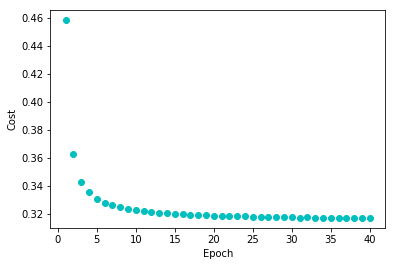

In [225]:
# Tensorflow Implementation
# tf.Graph 输入
# 给输入的分区不指定样本的数量，便于调整batch normalization的值
# 输入的数据是float类型
n_samples = len(X_train_one_hot_normed)
n_features = X_train_one_hot_normed.shape[1]
x = tf.placeholder(tf.float32 ,[None, n_features])
y = tf.placeholder(tf.float32 ,[None, 1]) #在这里因为是二分类问题就没有定义多个输出

# 模型待估计参数
W = tf.Variable(tf.zeros([n_features,1]))
b = tf.Variable(tf.zeros([1]))

## hyperparameter
learning_rate = 0.02
train_epochs = 40
batch_size = 100
display_step = 1

# 定义模型的输出
pred = tf.matmul(x, W) + b

# 定义模型的损失函数：逻辑回归采用交叉熵
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = pred,labels = y))
# 这里的损失函数不能够直接按照第二个自己定义的，可能原因是log(1+x),当x很小的时候可能返回的参数是零，
# 在tensorflow的实现当中使用了log1p(),这个函数在numpy中的精度比直接计算log(1+x)要高（可能原因）
cost1 = tf.reduce_mean(-y*tf.log(tf.nn.sigmoid(pred))-(1-y)*tf.log(1-tf.nn.sigmoid(pred)))

# 梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 初始化参数
# 注意在计算开始之前必须初始化参数，而且注意当参数初始化有执行顺序的时候，需要自己的定义初始化过程
# init = tf.global_varibales_initializer()(这个方法已经被废弃的)
# init = tf.initializers.global_variables()
init = tf.initialize_all_variables()

# 定义模型的准确性
# 如果说输出是多个节点，那么用tf.argmax(input, axis=None)，这里采用tf.argmax(input,axis=1)
predLabel = tf.round(tf.sigmoid(pred))
correct = tf.equal(predLabel, y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

# 模型训练
# 注意会话窗口的正常关闭，如果不采用以下上下文结构的化，否则程序会有溢出的报错
# 在tensorflow的结构下面，如果会话没有执行，基本上所有的函数返回的都只是操作，必须在会话中执行之后才会有返回值
with tf.Session() as sess:
    # 初始化参数
    sess.run(init)
    
    # 按照epoch训练，一个epoch就遍历所有的训练集
    for epoch in range(train_epochs):
        X_train_one_hot_normed, y_train = _shuffle(X_train_one_hot_normed,y_train)
        avg_cost = 0
        if n_samples % batch_size == 0:
            batches = n_samples//batch_size
        else:
            batches = n_samples//batch_size+1
        for i in range(batches):
            # sess.run()对应返回的是fetches的参数
            if (i+1)*batch_size <= n_samples:
                _, cos,cos1 = sess.run([optimizer, cost,cost1], 
                                  feed_dict ={x:X_train_one_hot_normed[i*batch_size:(i+1)*batch_size],
                                             y:y_train[i*batch_size:(i+1)*batch_size]})
            else:
                _, cos,cos1 = sess.run([optimizer, cost,cost1], 
                                  feed_dict ={x:X_train_one_hot_normed[i*batch_size:],
                                             y:y_train[i*batch_size:]})
            # 计算损失函数
            # print(cos,cos1) cos1经常无法计算
            avg_cost += cos/batches
        
        plt.plot(epoch+1, avg_cost, 'co')
        
        #每display_step时间显示日志
        if (epoch+1)%display_step == 0:
            print("Epoch:", "%04d"%(epoch+1), "cost=","{:.9f}".format(avg_cost))
            
    print("Optimization Finished")
    
    # 测试模型
    # eval()也是启动计算的一种方式，与session.run()有同样的作用，也就是说输入的是字典里面的参数，返回accuracy
    # accuracy.eval({})就是 sess.run(accuracy, feed_dict = {})
    print("Train Accuracy", accuracy.eval({x:X_train_one_hot_normed,y:y_train}))
    print("Test Accuracy", accuracy.eval({x:X_test_one_hot_normed,y:y_test}))
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.show()

In [199]:
y_train[1:100]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    